# The Solow model with climate change

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol, symbols, Eq, solve
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from tabulate import tabulate

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import SolowModelClass 
model = SolowModelClass()

# Model description

Our model project is based on the exam in Macroeconomics I from the 9th of January 2020. The exam looks at the classic Solow Model with technological growth and explores different levels of climate change, that cause damage to the production output with the fraction D. The model considered can be described by the following equations:

$$
\begin{aligned}
Y_t &= [1-D]K_t^\alpha (A_t L_t)^{1-\alpha}, 0 <\alpha<1\\
D &= 1-\frac{1}{1+\sigma{(\Delta T)}^2}, \sigma > 0 \\
K_{t+1} &= s Y_t+(1-\delta) K_t, 0<s<1,0<\delta<1,K_0>0 \\
A_{t+1} &=(1+g)A_t, A_0>0 \\
L_{t+1} &=(1+n)A_t, L_0>0
\end{aligned}
$$

The first equation is a Cobb-Douglas production function describing total output $(Y_t)$ as a function of physical capital $(K_t)$, population size $(L_t)$ and technology level $(A_t)$. We assume that climate change reduces output by a share D; i.e. a part of output $(DY_t)$ is destroyed and only the share $1-D$ of output can be used for consumption and investment. The damage from climate change is given by the second equation, where $\Delta T$ measures change in temperature. Capital accumulation is described by the third equation, where $s$ is the saving rate and $\delta$ is the attrition rate. The last two equations indicate how the level of technology $(A_t)$ and the population $(L_t)$ evolve over time.

We define $\tilde y_t=\frac{Y_t}{A_tL_t}$ and $\tilde k_t = \frac{K_t}{A_tL_t}$.

## Analytical solution

First, we derive the transition equation for capital per worker:

$$
\begin{aligned}
\frac{K_{t+1}}{A_{t+1} L_{t+1}} & =\frac{s Y_t+(1-\delta) K_t}{(1+g)(1+n) A_t L_t} \Leftrightarrow \\
\tilde{k}_{t+1} & =\frac{1}{(1+n)(1+g)}\left(s \tilde{y}_t+(1-\delta) \tilde{k}_t\right) \Leftrightarrow \\
\tilde{k}_{t+1} & =\frac{1}{(1+n)(1+g)}\left(s[1-D] \tilde{k}_t^\alpha+(1-\delta) \tilde{k}_t\right)
\end{aligned}
$$

In steady state $\tilde{k}_{t+1}=\tilde{k}_{t}=\tilde{k}^*$. Using this information, we define a function in the py-file (solve_analytical_ss) which analytically solves for the steady state value for capital, $\tilde k^*$:

In [2]:
model.solve_analytical_ss()

((-delta - g*n - g - n)/(s*(D - 1)))**(1/(alpha - 1))

From this it must be the case that $\tilde y^* = [1-D]^\frac{1}{1-\alpha} (\frac{s}{n+g+\delta +ng})^\frac{\alpha}{1-\alpha}$.

## Numerical solution

The transition equation can be shown in a phase diagram, from which we see that the model converges to it's steady state value, irrespective of starting value.

The phase diagram is created as a widget figure, with the possibility of varying the climate change damange, D, as well as the time period, T. 

In [3]:
#We create a function for the phase diagram:
def phasediagram(d,T) :

    #We call for the model parameters 
    val = model.val

    #We create two listsm in which we will store the values of k_t+1 and the 45 degree line (diagonal). 
    kt1_list = []
    diagonal_list = []

    #We loop over the time T to find the different values of k_t+1 and append it to the list. 
    for t in range(0,T):
        k_t1 = (val.s*(1-d)*t**val.alpha+(1-val.delta)*t)/((1+val.n)*(1+val.g))
        kt1_list.append(k_t1)

    #We loop over the time T to create the 45 degree line
    for t in range(0,T):
        diagonal = t
        diagonal_list.append(diagonal)             
            
    #Steadystate
    #ss = model.solve_num_ss()

    #We create a plot with the two functions:
    plt.figure(figsize=(5,5))
    plt.plot(diagonal_list, kt1_list, label=r'$\tilde k_{t+1}$', color = 'red')
    plt.plot(diagonal_list, diagonal_list, label='45 degree line', color = 'blue')
    #plt.scatter(model.D_vector.k_ss_list, model.D_vector.k_ss_list, c='g', linewidths=3, label='Steady State')
    #plt.text(ss, ss, '({}, {})'.format(round(ss,2), round(ss,2)))
    
    #We set limits and labels on the axis:
    plt.xlim(0,T)
    plt.ylim(0,T)
    plt.ylabel(r'$\tilde k_{t+1}$')
    plt.xlabel(r'$\tilde k_t$')
    
    #We set a title, grid and a legend
    plt.title('Figure 1: Phase diagram')
    plt.grid()
    plt.legend()
    return plt.show()

#We create a widget that slides through the values of D and T. 
widgets.interact(phasediagram, 
                        d     =  widgets.FloatSlider(description = 'D' , min = 0 ,    max = 1 , step = 0.1 , value = 0.0),
                        T     = widgets.IntSlider(description='T' ,          min = 0,     max = 50, step = 1,    value = 10))


interactive(children=(FloatSlider(value=0.0, description='D', max=1.0), IntSlider(value=10, description='T', m…

<function __main__.phasediagram(d, T)>

Our phase diagram shows the intersection between $\tilde{k}_{t+1}$ and $\tilde{k}_{t}$ which is the steady state of capital in the model. The level of capital in the steady state decreases as we introduce climate change in the model, as it reduces the production. 

We solve the model numerically in our py-file, where we have defined the models parameter values as in the Macroeconomics I exam (question 2.4). This optimization is done with the root scalar optimizer.

We start by solving the model for $D=0$ i.e. with no climate change:

In [4]:
model.val.d = 0 # sets parameter value
model.solve_num_ss()

(7.1638190350558375, 1.915127622038289)

The steady state level of capital pr. capita in the model without climate change is $\tilde{k}^*=7.164$ and the steady state level of GDP pr. capita is $\tilde{y}^*=1.915$

We now want to solve the model nummerically when varing the amount of climate changes D. We print our results in a table to see the effects of climate change on both $y$ and $k$:

In [5]:
# we refer to the definition in our py-file
model.D_vector()

╒═════╤══════════╤═══════════╤═══════════════════════════╕
│   D │     K_ss │      Y_ss │   Relative Y_ss compared  │
│     │          │           │       to situation where  │
│     │          │           │           D = 0 (in pct.) │
╞═════╪══════════╪═══════════╪═══════════════════════════╡
│ 0   │ 7.16382  │ 1.91513   │                 100       │
├─────┼──────────┼───────────┼───────────────────────────┤
│ 0.1 │ 6.12139  │ 1.63645   │                  85.4487  │
├─────┼──────────┼───────────┼───────────────────────────┤
│ 0.2 │ 5.13455  │ 1.37264   │                  71.6734  │
├─────┼──────────┼───────────┼───────────────────────────┤
│ 0.3 │ 4.20676  │ 1.12461   │                  58.7223  │
├─────┼──────────┼───────────┼───────────────────────────┤
│ 0.4 │ 3.34216  │ 0.89347   │                  46.6533  │
├─────┼──────────┼───────────┼───────────────────────────┤
│ 0.5 │ 2.54593  │ 0.680611  │                  35.5387  │
├─────┼──────────┼───────────┼──────────────────────────

It's clear to see, that for increasing climate change capital pr. capita and thus GDP pr. capita decreases. 

# Further analysis

### Simulation

In the following, we wish to simulate evolution of relative output pr. capita for different scenarios of climate change and compare the levels of growth in output. The simulation is made assuming that the economy is on the balanced growth path at time $t=0$. 

We look at 3 scenarios:
- Scenario 1: a situation without climate change $D = 0$
- Scenario 2: a situation with sudden constant climate change $D = 0.175$ from period $t=1$
- Scenatio 3: a situation with increase climate change based on the damage function 


To make our simulation, we need to calculate the parameter value of $\sigma$. We use sympy to find an expression for $\sigma$ and then solve it with the parameter values $t=100$, $D_{100} = 0.175$, and $\Delta T_{year} = 0.04$, as it's assumed that the temperature increases $0.04^{\circ}C$ pr. year.

In [6]:
model.solve_sigma_expression()

-D/(dT**2*(D - 1))

In [7]:
model.solve_sigma()

sigma = 0.013258


We make our simulation 

In [31]:
# we run our 3 simulations from the py-file: 
model = SolowModelClass()
sim = model.sim
model.simulate(D_param=0)
model.simulate(D_param=0.175)
model.simulate(D_param='growth')

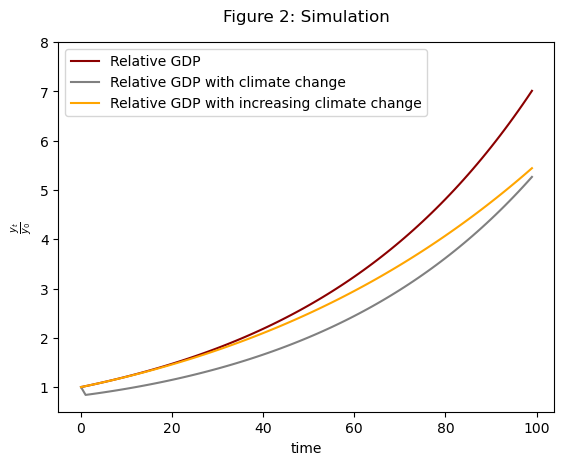

In [32]:
# we plot all three simulations in the same figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(model.par.simT),sim.fracY,label='Relative GDP',c='darkred')
ax.plot(np.arange(model.par.simT),sim.fracYD,label='Relative GDP with climate change',c='grey')
ax.plot(np.arange(model.par.simT),sim.fracYDgrowth,label='Relative GDP with increasing climate change',c='orange')
plt.ylim([0.5,8]) 

# we set axis labels, title and legend
ax.set_xlabel('time')
ax.set_ylabel(r'$\frac{y_t}{y_0}$')
ax.set_title('Figure 2: Simulation',pad=15)
ax.legend();

Our simulation shows that climate change in any form affects the relative output pr. capita negatively. 
For the sudden temperature change the damages on output pr. capita are more substantial than if we impose slowly increasing temperatures, which is also the more realistic scenario. However, this scenario does show increasingly negative effects on the output growth.

### Extension of the model

As an extension to the model we assume that the depreciation rate of capital is increasing with climate changes (here: $\Delta T$). We therefor add a new equation for $\delta$ allowing it to vary with the temperature. The intuition behind, is that increasing tempteratures correlate with extreme weather conditions which has a negative impact on capital accumulation. 

$$
\begin{aligned}
Y_t &= [1-D]K_t^\alpha (A_t L_t)^{1-\alpha}, 0 <\alpha<1\\
D &= 1-\frac{1}{1+\sigma{(\Delta T)}^2}, \sigma > 0 \\
K_{t+1} &= s Y_t+(1-\delta) K_t, 0<s<1,0<\delta<1,K_0>0 \\
\delta &= \delta_0 + \delta_1 \Delta T_t\\
A_{t+1} &=(1+g)A_t, A_0>0 \\
L_{t+1} &=(1+n)A_t, L_0>0
\end{aligned}
$$

In the simulation we set $\delta_1 =0.01$ and $\delta_0=0.05$ indicating an 1% percent increase in depreciation rate per $1^{\circ}C$  temperature increase as well as an initial depreciation rate of 0.05 (as in the original model). 

We can solve the new model numerically and find the following solution:

In [10]:
model.solve_num_extension()

(2.9387432669322338, 1.1774564689508507)

The new steady state value of capital is $\tilde{k}^*=2.939$ and the steady state level of output is $\tilde{y}^*=1.177$ (assuming that $\Delta T = 4$). We now run the new simulation and plot it together with the baseline scenario ($D = 0$) and the scenario from before (increasing climate changes).

In [34]:
# we run the simulation
model.extension()

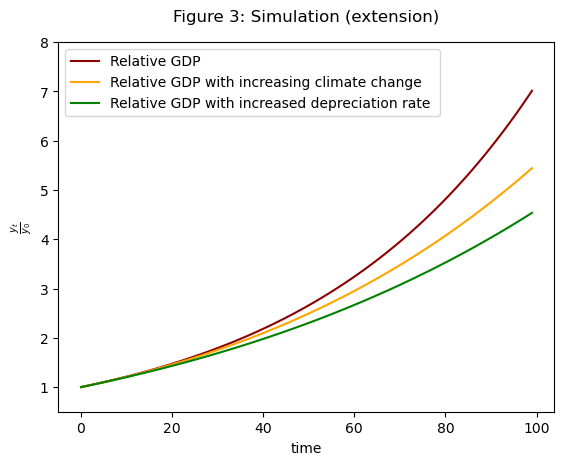

In [35]:
# we plot our simulations
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(model.par.simT),sim.fracY,label='Relative GDP',c='darkred')
ax.plot(np.arange(model.par.simT),sim.fracYDgrowth,label='Relative GDP with increasing climate change',c='orange')
ax.plot(np.arange(model.par.simT),sim.fracY_ext,label='Relative GDP with increased depreciation rate ',c='green')

plt.ylim([0.5,8]) 

# we set axis labels, title and legend
ax.set_xlabel('time')
ax.set_ylabel(r'$\frac{y_t}{y_0}$')
ax.set_title('Figure 3: Simulation (extension)',pad=15)
ax.legend();

The simulation shows that implementing the increased depreciation rate to the simulation, reduces the relative GDP further, compared to the scenario with incresing climate changes. 

# Conclusion

In this project we investigate the classic Solow model with technological growth and climate changes. Both an analytical and numerical solution is found stating that $\tilde k^* = (\frac{s[1-D]}{n+g+\delta + ng})^\frac{1}{1-\alpha} = 7.164$ and $\tilde y^* = [1-D]^\frac{1}{1-\alpha}(\frac{s}{n+g+\delta + ng})^\frac{\alpha}{1-\alpha} = 1.915$. By calculating $\tilde k^*$ and $\tilde y^*$ for different values of D (that is the fraction of production that is lost due to climate changes) we conclude that increasing climate changes reduces both capital - and GDP per capita. 

As a further analysis we simulate the relative GDP ($\frac{y_t}{y_0}$) in 3 different scenarios. In the first scenario we consider a situation without climate changes ($D = 0$). The second simulation is made assuming constant climate changes from period $t = 1$ ($D = 0.175$) and lastly we model a situation with increasing climate changes.
The simulation (figure 2) illustrates a negative effect from climate changes in all three scenarios. Further it seems that slowly increasing temperatur (scenario 3) is less damaging than the sudden temperature increase in scenario 2. 

We extend the model by assuming that the depreciation rate of capital is increasing with climate changes. More specific we add the following equation to our model: $\delta = \delta_0 + \delta_1 \Delta T_t$. The new simulation (figure 3) shows that allowing $\delta$ to vary with the temperature reduces the relative GDP further, when comparing to the previos scenario. 
 